In [19]:
%matplotlib inline
import pysd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
model = pysd.read_vensim('C:/repos/Defence-Autonomy/model_wip.mdl')

In [29]:
stress_to_willingness_values = np.arange(1,3.1,0.5)
stress_to_willingness_values

array([1. , 1.5, 2. , 2.5, 3. ])

In [23]:
def run_results(params_dict):
    res = model.run(params_dict,
                return_columns=['Constrained Defence Spending', 
                                'Cumulative Defence Spending', 
                                'rate of orders fulfilled', 
                                'Cumulative Earnings'])
    
    return res

In [ ]:
# res = model.run(params={'stress to willingness': 2}, 
#                 return_columns=['Constrained Defence Spending', 'Cumulative Defence Spending', 'rate of orders fulfilled', 'Cumulative Earnings']) 


In [ ]:
# # Columns needed 
# columns = [
#     'Constrained Defence Spending',
#     'Cumulative Defence Spending',
#     'rate of orders fulfilled',
#     'Cumulative Earnings',
#     'stress_to_willingness'
# ]

In [ ]:
# TESTING
# can we run multiple?
control_var = {'stress_to_willingness': 2, 'delay in delivery': 10}
results_list =[]

for stress in stress_to_willingness_values:
    control_var['stress to willingness'] = stress
    output_df = run_results(params_dict=control_var) 
    output_df['stress_to_willingness'] = stress
    results_list.append(output_df)

all_results_df = pd.concat(results_list)

In [24]:
control_var = {}
results_list =[]

for stress in stress_to_willingness_values:
    control_var['stress to willingness'] = stress
    output_df = run_results(params_dict=control_var) 
    output_df['stress_to_willingness'] = stress
    results_list.append(output_df)

all_results_df = pd.concat(results_list)

In [27]:
all_results_df.stress_to_willingness.unique()

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

<Axes: xlabel='time', ylabel='Constrained Defence Spending'>

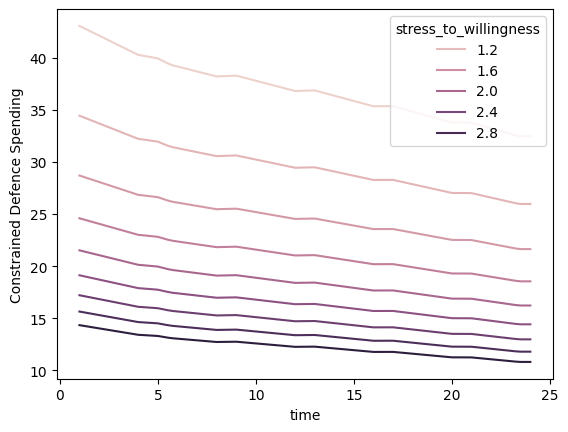

In [28]:
sns.lineplot(data=all_results_df, 
             x='time', 
             y = 'Constrained Defence Spending',
             hue='stress_to_willingness',
             hue_order=stress_to_willingness_values)

In [7]:
output

,Constrained Defence Spending,Cumulative Defence Spending,rate of orders fulfilled,Cumulative Earnings
time,,,,
1.00,14.343333,0.00000,2.520000,2.000000
1.25,14.266184,10.75750,2.520000,2.074970
1.50,14.189035,21.51500,2.519079,2.147001
1.75,14.111886,32.27250,2.517438,2.216067
2.00,14.034737,43.03000,2.515230,2.282152
...,...,...,...,...
23.00,10.891476,980.80875,2.494256,3.827653
23.25,10.846699,992.39875,2.485513,3.866280
23.50,10.817333,1003.98875,2.476212,3.904857


In [ ]:
values = model.run(return_columns=['Constrained Defence Spending', 'Cumulative Defence Spending', 'rate of orders fulfilled', 'Cumulative Earnings'])
values.head(5)

,Constrained Defence Spending,Cumulative Defence Spending,rate of orders fulfilled,Cumulative Earnings
time,,,,
1.00,21.515000,0.0000,2.520000,2.000000
1.25,21.399276,10.7575,2.520000,2.074970
1.50,21.283552,21.5150,2.521768,2.147001
1.75,21.167829,32.2725,2.524819,2.216141
2.00,21.052105,43.0300,2.528784,2.282420
